# Import

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


np.random.seed(123)

# Exercises

## 1

In [11]:
s = pd.DataFrame(np.random.poisson(2,10**5))
s.head()

,0
0,2
1,1
2,4
3,0
4,4


$ Poisson Distribution: \\$
$$ P\left( x \right) = \frac{{e^{ - \lambda } \lambda ^x }}{{x!}} $$

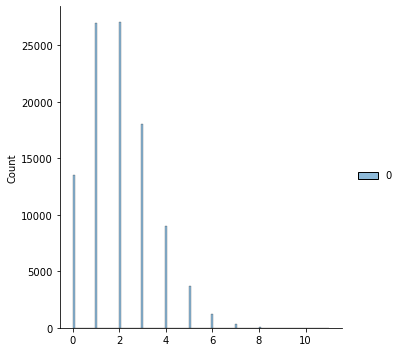

In [12]:
sns.displot(data = s)

Simulation: What is the probability that no cars drive up in the noon hour?

In [19]:
(s==0).mean()

0    0.13559
dtype: float64

Theoretical: What is the probability that no cars drive up in the noon hour?

In [14]:
stats.poisson(2).pmf(0)


0.1353352832366127

Simulation: What is the probability that 3 or more cars come through the drive through?

In [23]:
(s>=3).mean()

0    0.32377
dtype: float64

Theoretical: What is the probability that 3 or more cars come through the drive through?

In [22]:
stats.poisson(2).sf(2)

0.32332358381693654

Simulation: How likely is it that the drive through gets at least 1 car?

In [17]:
(s>=1).mean()

0    0.86441
dtype: float64

Theoretical: How likely is it that the drive through gets at least 1 car?

In [24]:
stats.poisson(2).sf(0)

0.8646647167633873

## 2

In [35]:
grades=pd.DataFrame(np.random.normal(3, 0.3, size=(10**5)))
grades.head(5)

,0
0,2.865655
1,2.765310
2,2.831246
3,2.692876
4,3.324458


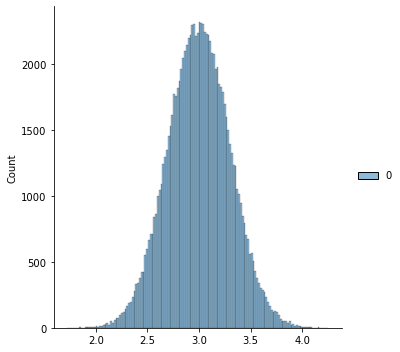

In [30]:
sns.displot(grades)

In [61]:
grades.sort_values(by=0, inplace=True, ignore_index=True)
grades.head()

,0
0,1.560815
1,1.662170
2,1.674514
3,1.739097
4,1.771564


In [71]:
grade_95=int(0.95*grades.idxmax())
grade_95

94999

Simulation: What grade point average is required to be in the top 5% of the graduating class?

In [72]:
float(grades.values[grade_95].round(4))

3.4944

In [73]:
grade_15=int(0.15*grades.idxmax())
grade_15

14999

Simulation: What GPA constitutes the bottom 15% of the class?

In [74]:
float(grades.values[grade_15].round(4))

2.6904

In [81]:
grade_dif=grades.max()-grades.min()
un_decile=grade_dif/10


Simulation: Determine the range of the third decile.

In [82]:
# third decile upper bound

decile=3
third_decile=decile*un_decile+grades.min()
third_decile

0    2.395334
dtype: float64

In [85]:
# third decile lower bound

decile=2
segundo_decile=decile*un_decile+grades.min()
segundo_decile

0    2.117161
dtype: float64

Simulation: Would a student with a 2.8 grade point average qualify for this scholarship?

In [95]:
# No, 2.8 is outside the range of the 3rd-decile.

Simulation: If I have a GPA of 3.5, what percentile am I in?

In [94]:
f"{100*float((grades<=3.5).mean()):.2f}%"

'95.16%'